In [5]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd


In [6]:
tf.__version__

'2.10.0'

In [7]:
%load_ext tensorboard

In [8]:
logdir='log'

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 2s 0us/step


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1372 - accuracy: 0.9578 - val_loss: 0.0486 - val_accuracy: 0.9836
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0448 - accuracy: 0.9857 - val_loss: 0.0385 - val_accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0312 - val_accuracy: 0.9905
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0262 - val_accuracy: 0.9906
Epoch 5/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0278 - val_accuracy: 0.9911


In [28]:
y_true=test_labels
predict_x = model.predict(test_images)
y_pred = np.argmax(predict_x,axis=1)


313/313 [==============================] - 2s 6ms/step


In [29]:
classes=[0,1,2,3,4,5,6,7,8,9]

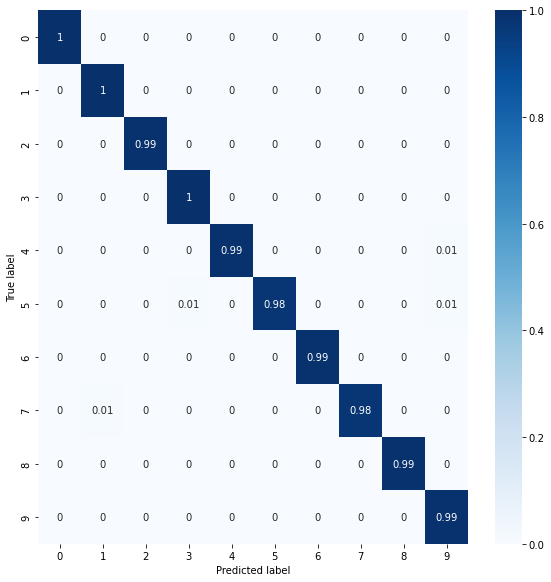

In [30]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [67]:
con_mat

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    1,    0,    0,    0],
       [   2,    2, 1021,    0,    1,    0,    1,    3,    2,    0],
       [   0,    0,    1, 1007,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,  975,    0,    0,    0,    0,    7],
       [   0,    0,    0,    8,    0,  875,    2,    1,    1,    5],
       [   3,    2,    0,    1,    2,    1,  949,    0,    0,    0],
       [   0,    7,    3,    0,    3,    0,    0, 1009,    1,    5],
       [   3,    0,    2,    0,    3,    1,    2,    0,  961,    2],
       [   0,    2,    0,    0,    4,    1,    0,    1,    0, 1001]])

In [68]:
con_mat = pd.DataFrame(con_mat)

In [70]:

TP = 0
FN = 0
FP = 0
TN = 0
for i in classes:
    for j in classes:
        tpt = con_mat[i][j]
        fnt = con_mat.iloc[0].sum() - con_mat[0][0]
        fpt = con_mat[0].sum() - con_mat[0][0]
        tnt = con_mat.sum().sum() - tpt - fnt - fpt
        TP = TP+tpt
        FN = FN+fnt
        FP = FP+fpt
        TN = TN+tnt

In [71]:
TP, FN, FP, TN

(10000, 100, 800, 989100)

In [81]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Acurácia :',Accuracy)
Sensitivity = TP/(TP+FN)
print('Sensibilidade :',Sensitivity)
Especificity = TN/(FP+TN)
print('Especificidade: ',Especificity)
Precision = TP/(TP+FP)
print('Precisão: ',Precision)
Fscore = 2*(Precision*Sensitivity)/(Precision+Sensitivity)
print('F-score',Fscore)

Acurácia : 0.9991
Sensibilidade : 0.9900990099009901
Especificidade:  0.9991918375593495
Precisão:  0.9259259259259259
F-score 0.9569377990430621


In [32]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [35]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred = model1.predict_classes(test_images)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)
  
  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)

    
logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [37]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0, 
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(np.argmax(model.predict(test_images),axis=1), test_labels),
)


313/313 [==============================] - 2s 5ms/step


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
# Start TensorBoard.
%tensorboard --logdir logs/images